# Final Project: Predicting Performance of Stocks in the Dow Jones Index

The Dow Jones data set was taken from UCI Machine Learning Repository. As the documentation states, a six-month range of weekly samples from Jan to June 2011 are given, each containing 16 feature values: open, high, low, close, volume, percent change price, percent change volume over last week, previous weeks volume, next weeks open, next weeks close, percent change next weeks price, days to next dividend and percent return next dividend.  The size of the imported data matches with the expected 750 x 16 dataset, the first and last several rows have values with reasonable ranges. The data set is divided into two quarters. The first quarter is intended to be used as the training data and the second quarter is intended to be used as the testing data. We will be following this data division with relevant algorithms that require training and testing data.

Ideally, we are interested in the stock that will produce the greatest rate of return in the following week. Thus, we will compare the accuracy of rate of return prediction across three different algorithms: linear regression, random forest and clustering.

## Importing the Data

In [2]:
import pandas as pd
df = pd.read_csv('dow.data')

In [3]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [5]:
x = df[['percent_change_next_weeks_price']] 
print (x)

     percent_change_next_weeks_price
0                          -4.428490
1                          -2.470660
2                           1.638310
3                           5.933250
4                           0.230814
..                               ...
745                        -2.521610
746                        -1.420980
747                        -1.225000
748                        -2.377620
749                         6.672740

[750 rows x 1 columns]


In [7]:
y = df [['date']]
print (y)

          date
0     1/7/2011
1    1/14/2011
2    1/21/2011
3    1/28/2011
4     2/4/2011
..         ...
745  5/27/2011
746   6/3/2011
747  6/10/2011
748  6/17/2011
749  6/24/2011

[750 rows x 1 columns]


## Clustering

The Machine Learning and Data Mining in Pattern Recognition paper uses the Dynamic Radius Species Conserving Genetic Algorithm, a kind of clustering algorithm. Since we haven't learned this in class, we can try to reproduce the results using clustering. They developed rules from the dataset to assign an indicator to each stock per week. The stock with a higher indicator would be selected. However, if two stocks have the same indicator then they choose the stock with the greatest price percent gain. Since we aren't able to assign indicators to the dataset, we can reproduce the results by measuring the price percent change between the current week and the next week. Specifically, we will be measuring the feature "percent_change_next_weeks_price".  

The Dow Jones has 0.13% weekly rate of return while the DSGA has an average 0.54% weekly rate of return.

In [8]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [127]:
ourcolors = ['#f0787e', '#f5a841', '#5ac5bc', '#ee65a3', '#f5e34b', '#640587', '#c2c36d',
  '#2e003a', '#878587', '#d3abea', '#f2a227', '#f0db08', '#148503', '#0a6940',
  '#043834', '#726edb', '#db6e6e', '#db6ecb', '#6edb91']

### Determining the Optimal Number of Clusters

The inertia of a clustering algorithm measures how well a dataset is clustered by kmeans. It is calculated by finding the distance between each point in the cluster and the cluster's centroid, squaring these distances and summing them together. The inertia of a clustering algorithm is similar to the the shape of a negative exponent function where the difference in inertia will taper off after a certain number of clusters. We will test with different number of clusters to determine the optimal number of clusters to use. 

#### 10 Clusters

In [115]:
kmeans = KMeans(n_clusters=10)

In [116]:
kmeans.fit(x)

KMeans(n_clusters=10)

In [117]:
kmeans.labels_

array([4, 1, 7, 3, 2, 2, 9, 9, 8, 7, 6, 7, 6, 2, 4, 2, 3, 9, 8, 2, 2, 2,
       7, 2, 2, 7, 8, 6, 2, 2, 2, 2, 2, 1, 6, 2, 3, 4, 4, 6, 7, 2, 9, 9,
       7, 9, 4, 2, 2, 9, 6, 6, 6, 0, 1, 2, 8, 0, 0, 6, 7, 1, 2, 3, 5, 2,
       2, 9, 1, 8, 2, 9, 0, 2, 2, 6, 2, 6, 0, 7, 4, 6, 0, 7, 6, 1, 6, 6,
       6, 0, 9, 2, 1, 2, 2, 7, 2, 7, 9, 6, 3, 2, 2, 7, 9, 8, 6, 2, 7, 6,
       7, 0, 0, 2, 2, 1, 2, 8, 2, 0, 3, 7, 2, 2, 7, 0, 4, 2, 2, 1, 6, 2,
       6, 0, 1, 6, 7, 2, 5, 9, 1, 2, 7, 8, 0, 6, 0, 6, 2, 2, 2, 2, 2, 8,
       0, 7, 7, 2, 0, 2, 2, 0, 2, 2, 8, 8, 0, 8, 2, 2, 4, 7, 2, 2, 9, 7,
       1, 9, 2, 2, 6, 2, 9, 2, 6, 6, 9, 1, 2, 2, 2, 2, 7, 2, 1, 0, 9, 2,
       6, 2, 2, 9, 7, 2, 2, 2, 9, 2, 7, 7, 7, 7, 2, 1, 6, 6, 2, 2, 9, 2,
       0, 2, 9, 0, 2, 4, 0, 2, 0, 7, 9, 2, 6, 7, 1, 2, 9, 1, 0, 2, 5, 2,
       1, 9, 2, 2, 9, 0, 2, 9, 7, 7, 2, 2, 2, 2, 9, 2, 2, 1, 9, 1, 7, 2,
       2, 2, 2, 3, 1, 7, 2, 6, 2, 6, 2, 2, 7, 2, 1, 9, 7, 2, 9, 9, 2, 2,
       2, 7, 2, 2, 8, 0, 7, 2, 2, 9, 7, 9, 2, 3, 0,

In [118]:
x.iloc[0]

percent_change_next_weeks_price   -4
Name: 0, dtype: int64

In [119]:
kmeans.predict(x)

array([4, 1, 7, 3, 2, 2, 9, 9, 8, 7, 6, 7, 6, 2, 4, 2, 3, 9, 8, 2, 2, 2,
       7, 2, 2, 7, 8, 6, 2, 2, 2, 2, 2, 1, 6, 2, 3, 4, 4, 6, 7, 2, 9, 9,
       7, 9, 4, 2, 2, 9, 6, 6, 6, 0, 1, 2, 8, 0, 0, 6, 7, 1, 2, 3, 5, 2,
       2, 9, 1, 8, 2, 9, 0, 2, 2, 6, 2, 6, 0, 7, 4, 6, 0, 7, 6, 1, 6, 6,
       6, 0, 9, 2, 1, 2, 2, 7, 2, 7, 9, 6, 3, 2, 2, 7, 9, 8, 6, 2, 7, 6,
       7, 0, 0, 2, 2, 1, 2, 8, 2, 0, 3, 7, 2, 2, 7, 0, 4, 2, 2, 1, 6, 2,
       6, 0, 1, 6, 7, 2, 5, 9, 1, 2, 7, 8, 0, 6, 0, 6, 2, 2, 2, 2, 2, 8,
       0, 7, 7, 2, 0, 2, 2, 0, 2, 2, 8, 8, 0, 8, 2, 2, 4, 7, 2, 2, 9, 7,
       1, 9, 2, 2, 6, 2, 9, 2, 6, 6, 9, 1, 2, 2, 2, 2, 7, 2, 1, 0, 9, 2,
       6, 2, 2, 9, 7, 2, 2, 2, 9, 2, 7, 7, 7, 7, 2, 1, 6, 6, 2, 2, 9, 2,
       0, 2, 9, 0, 2, 4, 0, 2, 0, 7, 9, 2, 6, 7, 1, 2, 9, 1, 0, 2, 5, 2,
       1, 9, 2, 2, 9, 0, 2, 9, 7, 7, 2, 2, 2, 2, 9, 2, 2, 1, 9, 1, 7, 2,
       2, 2, 2, 3, 1, 7, 2, 6, 2, 6, 2, 2, 7, 2, 1, 9, 7, 2, 9, 9, 2, 2,
       2, 7, 2, 2, 8, 0, 7, 2, 2, 9, 7, 9, 2, 3, 0,

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 10 Clusters')

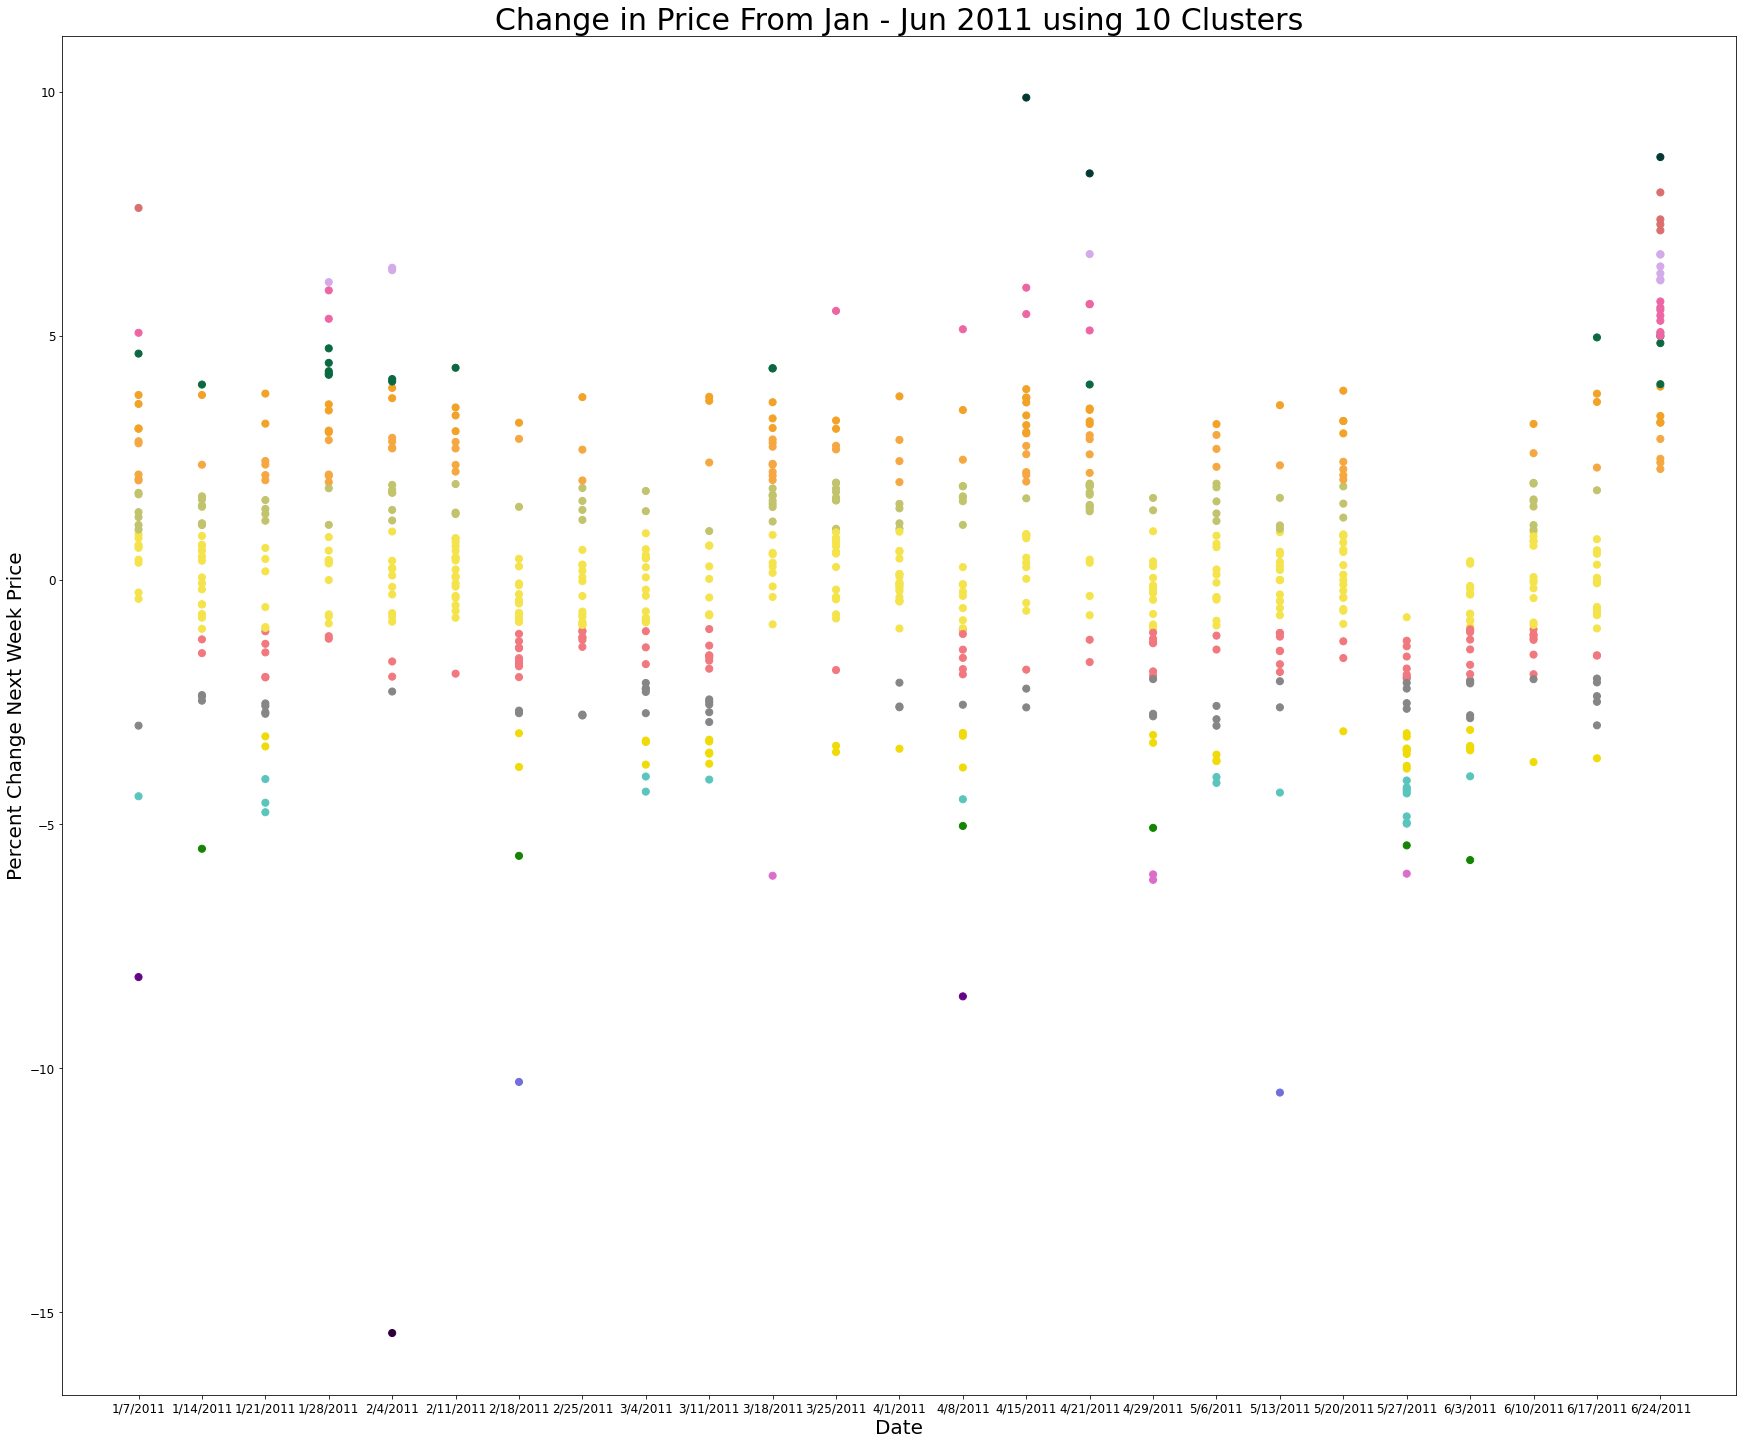

In [151]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 10 Clusters', fontsize=30)

In [121]:
print(kmeans.inertia_)

100.07826086956518


#### 15 Clusters

In [122]:
kmeans = KMeans(n_clusters=15)

In [123]:
kmeans.fit(x)

KMeans(n_clusters=15)

In [124]:
kmeans.labels_

array([ 7,  9,  6,  1,  0,  0,  5,  5,  2,  6, 13,  6, 13,  0,  7,  0, 14,
        5,  2,  0,  0,  0,  6,  0,  0,  6,  2,  3,  0,  0,  0,  0,  0,  9,
       13,  0, 10, 12,  7, 13,  6,  0,  5,  5,  6,  5, 12,  0,  0,  5,  3,
        3,  3,  8,  9,  0,  2,  8,  8,  3,  6,  9,  0,  1, 11,  0,  0,  5,
        9,  2,  0,  5,  8,  0,  0,  3,  0,  3,  8,  6,  7,  3,  8,  6,  3,
        9,  3, 13,  3,  8,  5,  0,  9,  0,  0,  6,  0,  6,  5, 13, 14,  0,
        0,  6,  5,  2,  3,  0,  6, 13,  6,  8,  8,  0,  0,  9,  0,  2,  0,
        8,  1,  6,  0,  0,  6,  8, 12,  0,  0,  9,  3,  0,  3,  8,  9, 13,
        6,  0,  4,  5,  9,  0,  6,  2,  8,  3,  8,  3,  0,  0,  0,  0,  0,
        2,  8,  6,  6,  0,  8,  0,  0,  8,  0,  0,  2,  2,  8,  2,  0,  0,
        7,  6,  0,  0,  5,  6,  9,  5,  0,  0,  3,  0,  5,  0, 13, 13,  5,
        9,  0,  0,  0,  0,  6,  0,  9,  8,  5,  0,  3,  0,  0,  5,  6,  0,
        0,  0,  5,  0,  6,  6,  6,  6,  0,  9,  3,  3,  0,  0,  5,  0,  8,
        0,  5,  8,  0,  7

In [125]:
kmeans.predict(x)

array([ 7,  9,  6,  1,  0,  0,  5,  5,  2,  6, 13,  6, 13,  0,  7,  0, 14,
        5,  2,  0,  0,  0,  6,  0,  0,  6,  2,  3,  0,  0,  0,  0,  0,  9,
       13,  0, 10, 12,  7, 13,  6,  0,  5,  5,  6,  5, 12,  0,  0,  5,  3,
        3,  3,  8,  9,  0,  2,  8,  8,  3,  6,  9,  0,  1, 11,  0,  0,  5,
        9,  2,  0,  5,  8,  0,  0,  3,  0,  3,  8,  6,  7,  3,  8,  6,  3,
        9,  3, 13,  3,  8,  5,  0,  9,  0,  0,  6,  0,  6,  5, 13, 14,  0,
        0,  6,  5,  2,  3,  0,  6, 13,  6,  8,  8,  0,  0,  9,  0,  2,  0,
        8,  1,  6,  0,  0,  6,  8, 12,  0,  0,  9,  3,  0,  3,  8,  9, 13,
        6,  0,  4,  5,  9,  0,  6,  2,  8,  3,  8,  3,  0,  0,  0,  0,  0,
        2,  8,  6,  6,  0,  8,  0,  0,  8,  0,  0,  2,  2,  8,  2,  0,  0,
        7,  6,  0,  0,  5,  6,  9,  5,  0,  0,  3,  0,  5,  0, 13, 13,  5,
        9,  0,  0,  0,  0,  6,  0,  9,  8,  5,  0,  3,  0,  0,  5,  6,  0,
        0,  0,  5,  0,  6,  6,  6,  6,  0,  9,  3,  3,  0,  0,  5,  0,  8,
        0,  5,  8,  0,  7

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 15 Clusters')

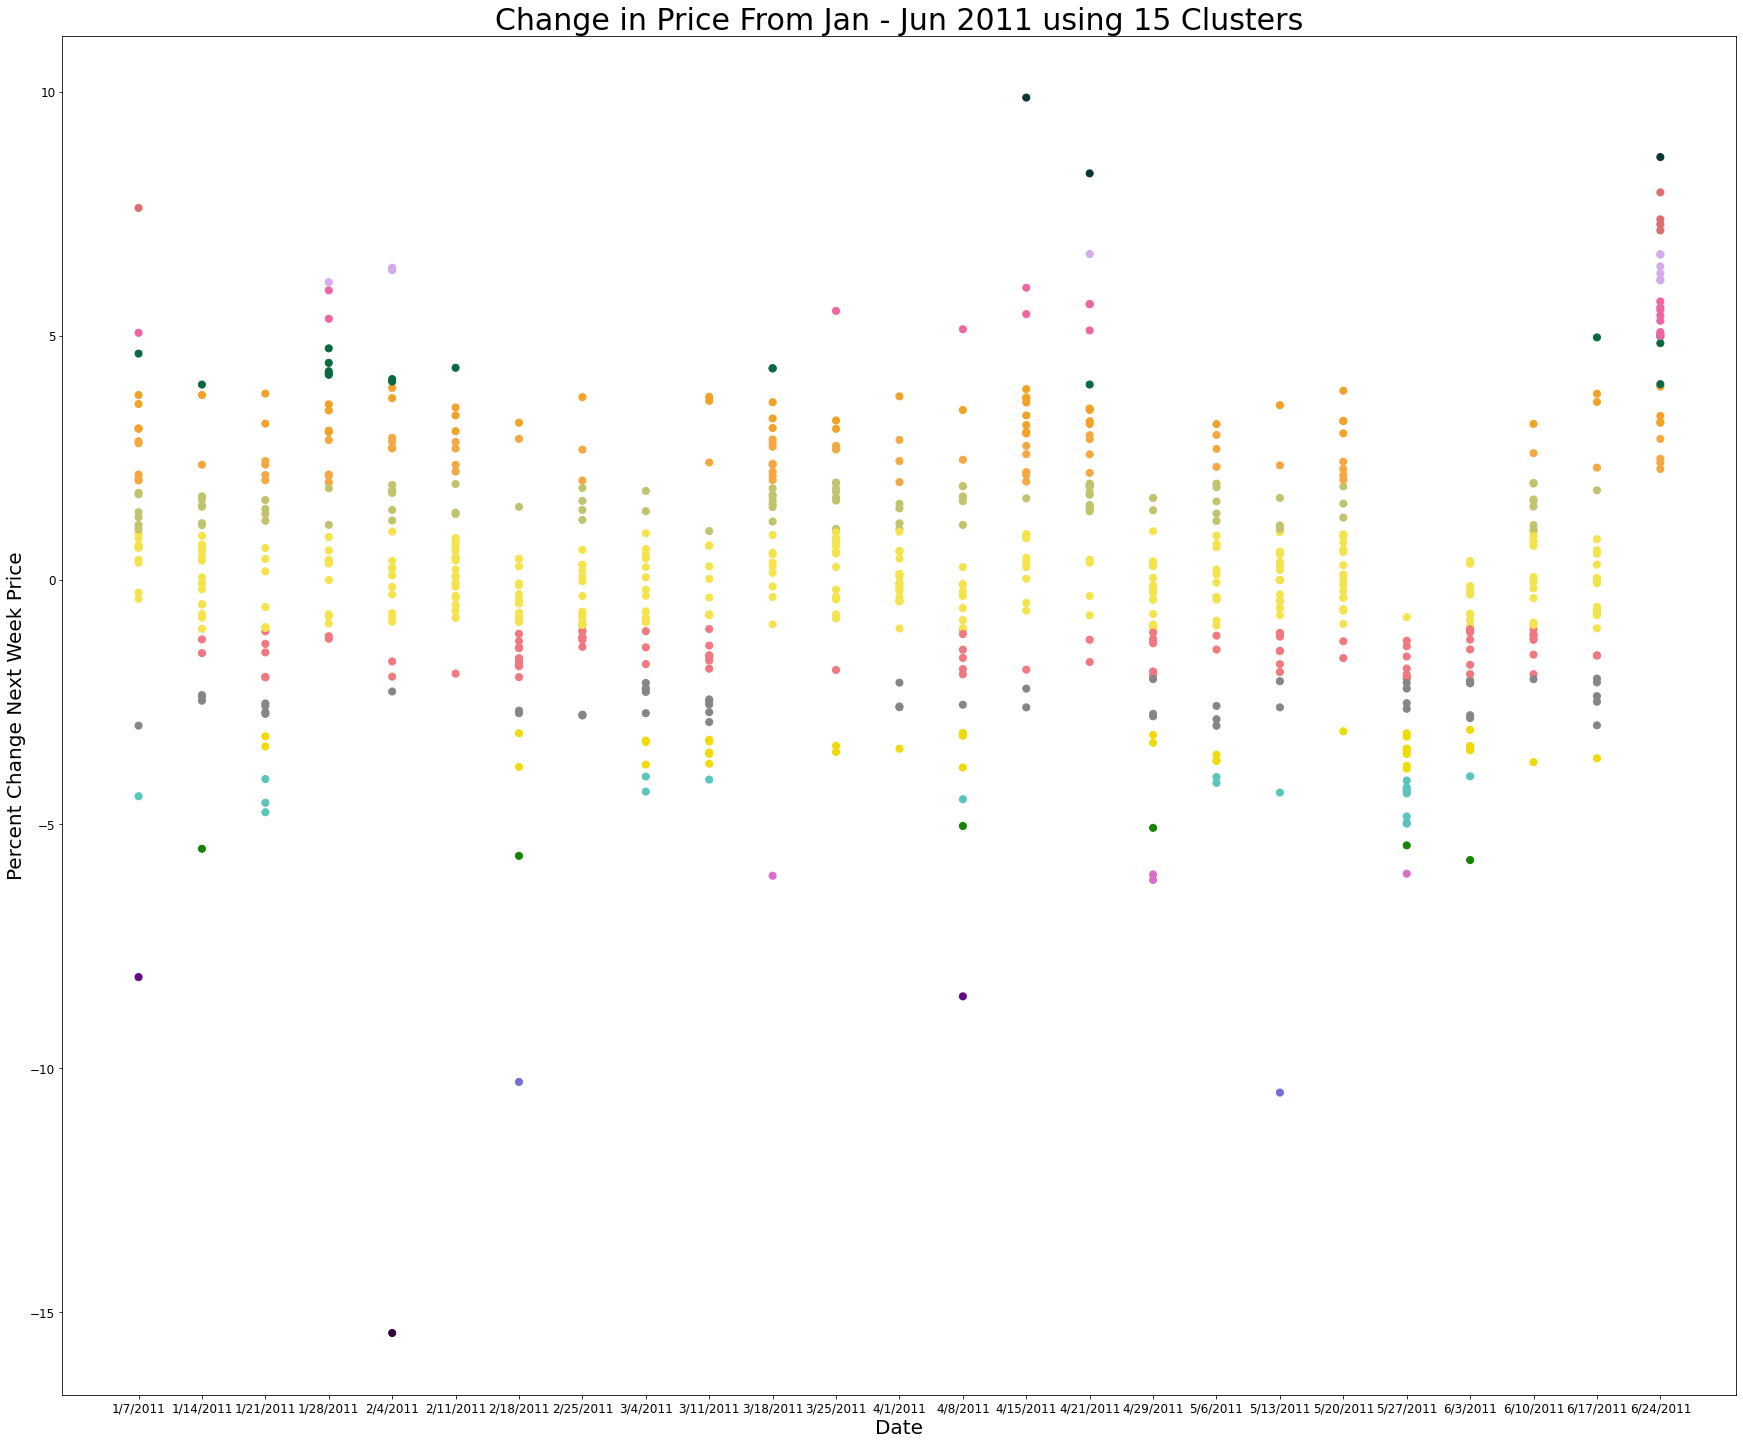

In [150]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 15 Clusters', fontsize=30)

In [130]:
print(kmeans.inertia_)

10.399999999999999


#### 18 Clusters

In [139]:
kmeans = KMeans(n_clusters=18)

In [140]:
kmeans.fit(x)

KMeans(n_clusters=18)

In [141]:
kmeans.labels_

array([ 2,  8,  6,  3,  4,  4,  0,  0, 11,  6, 13,  6, 13,  4,  2,  4,  9,
        0, 11,  4,  4,  4,  6,  4,  4,  6, 11, 10,  4,  4,  4,  4,  4,  8,
       13,  4, 16, 12,  2, 13,  6,  4,  0,  0,  6,  0, 17,  4,  4,  0, 10,
       10, 10,  1,  8,  4, 11,  1,  1, 10,  6,  8,  4,  3,  7,  4,  4,  0,
        8, 11,  4,  0,  1,  4,  4, 10,  4, 10,  1,  6,  2, 10,  1,  6, 10,
        8, 10, 13, 10,  1,  0,  4,  8,  4,  4,  6,  4,  6,  0, 13,  9,  4,
        4,  6,  0, 11, 10,  4,  6, 13,  6,  1,  1,  4,  4,  8,  4, 11,  4,
        1,  3,  6,  4,  4,  6,  1, 12,  4,  4,  8, 10,  4, 10,  1,  8, 13,
        6,  4, 15,  0,  8,  4,  6, 11,  1, 10,  1, 10,  4,  4,  4,  4,  4,
       11,  1,  6,  6,  4,  1,  4,  4,  1,  4,  4, 11, 11,  1, 11,  4,  4,
        2,  6,  4,  4,  0,  6,  8,  0,  4,  4, 10,  4,  0,  4, 13, 13,  0,
        8,  4,  4,  4,  4,  6,  4,  8,  1,  0,  4, 10,  4,  4,  0,  6,  4,
        4,  4,  0,  4,  6,  6,  6,  6,  4,  8, 10, 10,  4,  4,  0,  4,  1,
        4,  0,  1,  4,  2

In [142]:
kmeans.predict(x)

array([ 2,  8,  6,  3,  4,  4,  0,  0, 11,  6, 13,  6, 13,  4,  2,  4,  9,
        0, 11,  4,  4,  4,  6,  4,  4,  6, 11, 10,  4,  4,  4,  4,  4,  8,
       13,  4, 16, 12,  2, 13,  6,  4,  0,  0,  6,  0, 17,  4,  4,  0, 10,
       10, 10,  1,  8,  4, 11,  1,  1, 10,  6,  8,  4,  3,  7,  4,  4,  0,
        8, 11,  4,  0,  1,  4,  4, 10,  4, 10,  1,  6,  2, 10,  1,  6, 10,
        8, 10, 13, 10,  1,  0,  4,  8,  4,  4,  6,  4,  6,  0, 13,  9,  4,
        4,  6,  0, 11, 10,  4,  6, 13,  6,  1,  1,  4,  4,  8,  4, 11,  4,
        1,  3,  6,  4,  4,  6,  1, 12,  4,  4,  8, 10,  4, 10,  1,  8, 13,
        6,  4, 15,  0,  8,  4,  6, 11,  1, 10,  1, 10,  4,  4,  4,  4,  4,
       11,  1,  6,  6,  4,  1,  4,  4,  1,  4,  4, 11, 11,  1, 11,  4,  4,
        2,  6,  4,  4,  0,  6,  8,  0,  4,  4, 10,  4,  0,  4, 13, 13,  0,
        8,  4,  4,  4,  4,  6,  4,  8,  1,  0,  4, 10,  4,  4,  0,  6,  4,
        4,  4,  0,  4,  6,  6,  6,  6,  4,  8, 10, 10,  4,  4,  0,  4,  1,
        4,  0,  1,  4,  2

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 18 Clusters')

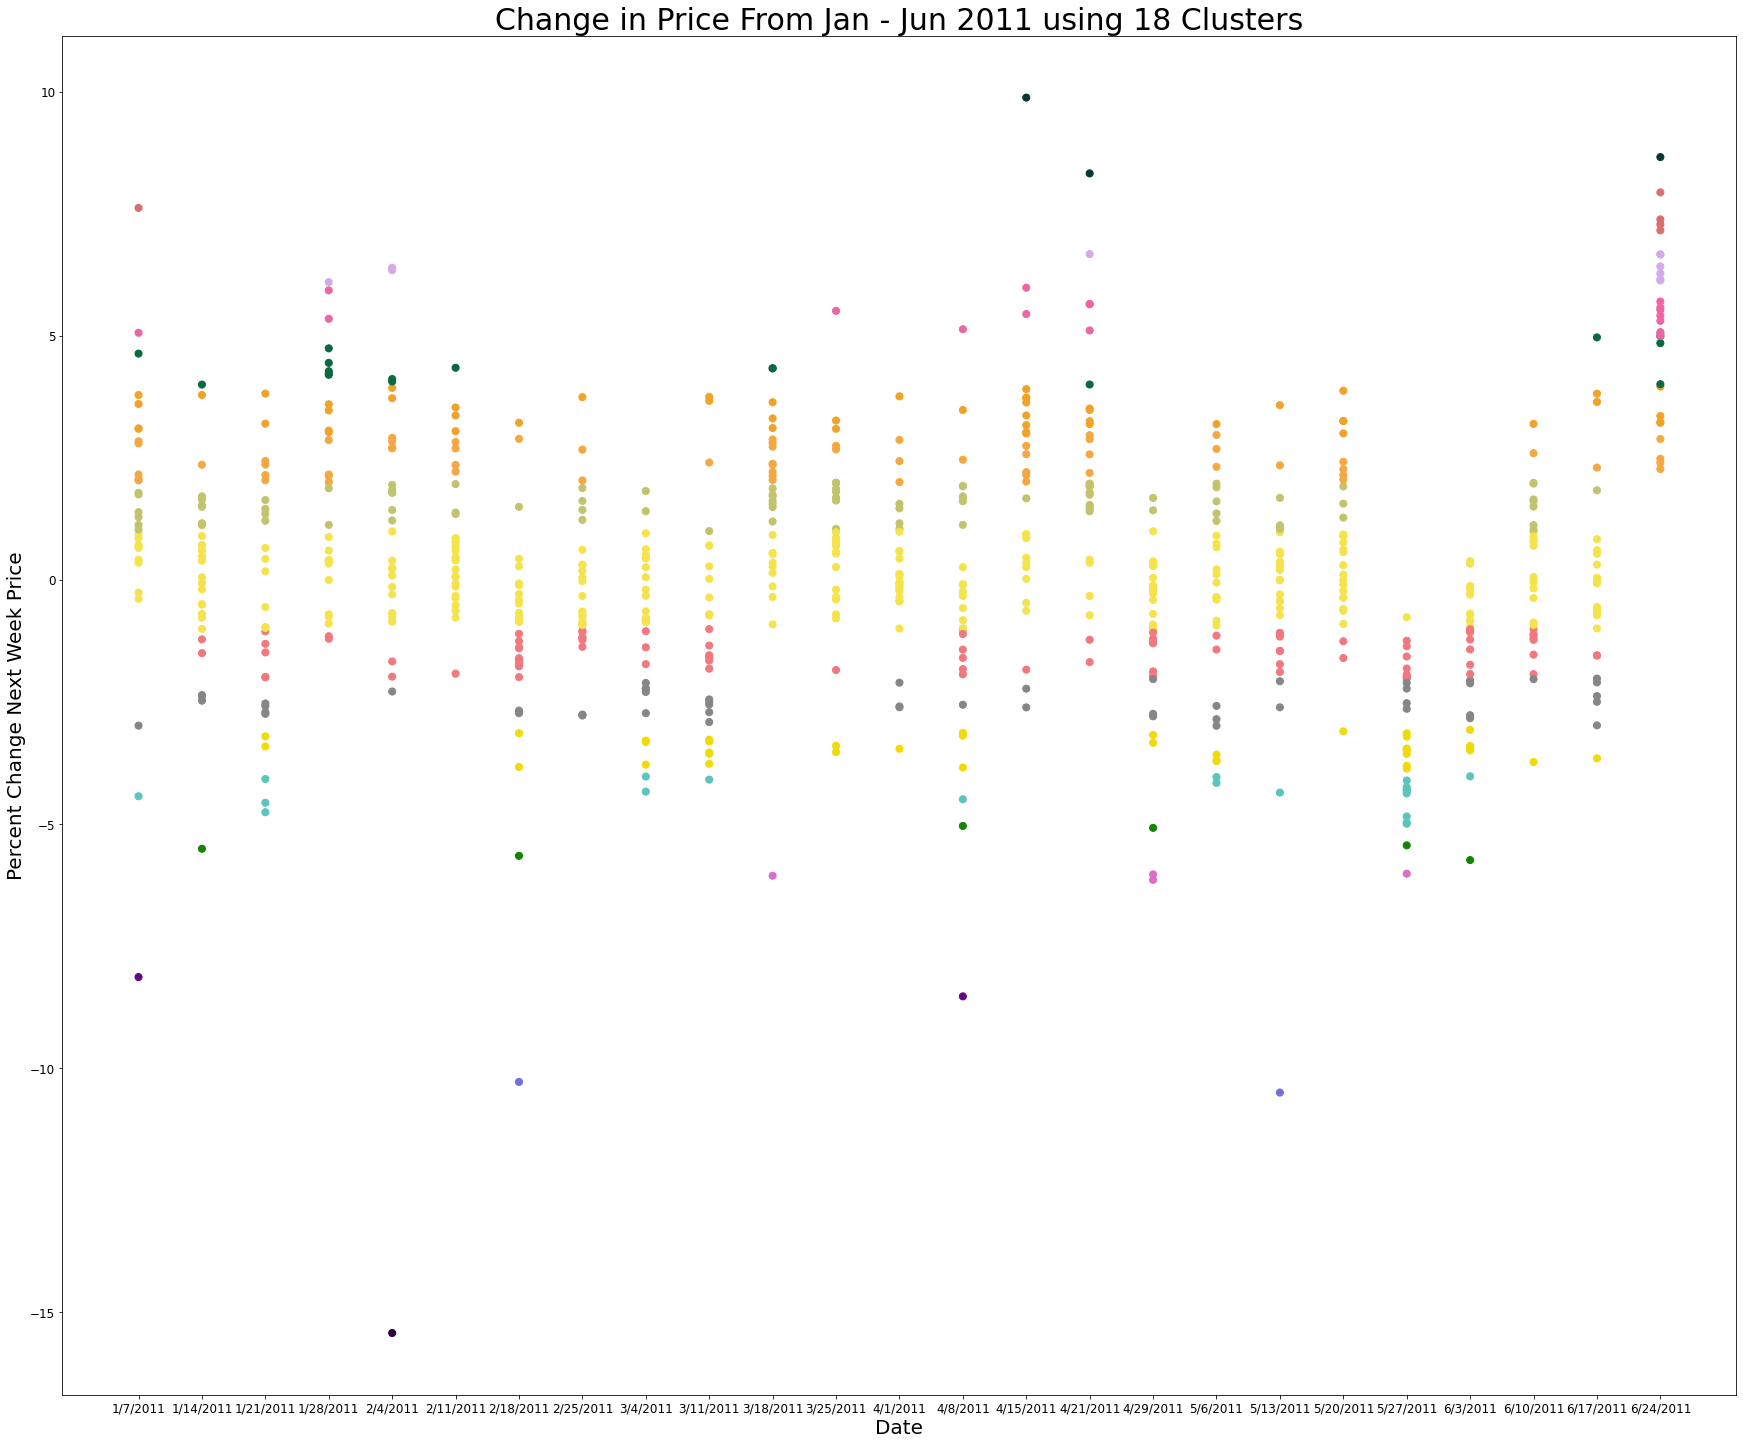

In [149]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                title="Change in Price From Jan - Jun 2011",
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 18 Clusters', fontsize=30)

In [152]:
print(kmeans.inertia_)

0.6666666666666667


#### Concluding the Best Number of Clusters
The best number of clusters to use is 18 clusters as it produces the lowest inertia of 0.66. 

### Calculating Accuracy 

## Random Forest

The paper, "Predicting the direction of stock market prices using random forest", uses an ensemble of random forests to determine the stock that will provide the most amount of return. Each forest is trained on a different feature subspace so each forest works with a different portion of the data, and will never see the entire data set. This reduces the variance that can come with only using one random forest, however, it slightly increases biases that may be in the data. Overall, the Random Forest algorithm used in this paper makes decisions upon relative strength index, stochastic oscillator, williams %R, moving average convergence divergence, price rate of change, and on balance volume. The definition of these terms are further explained in the respective paper. The paper was able to achieve an 85% - 90% accuracy in predictions over the span of 30 days in the data. 

In [210]:
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.tree

We need to convert the date into a numerical value in order to do regression. 

In [211]:
import datetime as dt
y_num = pd.to_datetime(y['date'], format="%m/%d/%Y")
y_num=y_num.map(dt.datetime.toordinal)
print (y_num)

0      734144
1      734151
2      734158
3      734165
4      734172
        ...  
745    734284
746    734291
747    734298
748    734305
749    734312
Name: date, Length: 750, dtype: int64


#### Determining the Optimal Depth

In [212]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=10)

In [213]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y_num, test_size=0.5, random_state=42)

In [214]:
model.fit(x_train, y_train.values.ravel())

RandomForestRegressor(max_depth=10)

In [215]:
y_pred = model.predict(x_test)

In [216]:
print('MSE_depth10 = ', mean_squared_error(y_test, y_pred))

MSE_depth10 =  2462.199914777436


In [218]:
text_representation = tree.export_text(model)
print(text_representation)

NameError: name 'tree' is not defined